### System

The total Hamiltonian of the system is given by:

$
H = H_0 + H_{\text{SB}} = H_{\text{S}} + H_{\text{B}} + H_{\text{SB}}
$

where:
- $ H_{\text{S}} $ is the system Hamiltonian
- $ H_{\text{B}} $ is the bath Hamiltonian
- $ H_{\text{SB}} $ is the system-bath interaction Hamiltonian

#### System Hamiltonian

The system Hamiltonian $ H_{\text{S}} $ consists of an atomic Hamiltonian $ H_{\text{atomic}} $ and an interaction with a laser field $ H_{\text{I}}(t) $:

$
H_{\text{S}} = H_{\text{atomic}} + H_{\text{I}}(t)
$

For one atom, 

$ 
H_{\text{atomic}} = \hbar \omega_a |e\rangle\langle e|
$

is defined by a two level system with ground state $ |g\rangle $, seperated from an excited state $ |e\rangle $ by $ \omega_a $.

For two atoms (dimer system), the atomic Hamiltonian is given by the dimer Hamiltonian $ H_{\text{dimer}} $ as:

$
H_{\text{atomic}} = H_{\text{dimer}} = 0 |0\rangle\langle0| + \hbar \omega_a |A\rangle\langle A| + \hbar \omega_b |B\rangle\langle B| + J (|B\rangle\langle A| + |A\rangle\langle B|) +  \hbar (\omega_a + \omega_b) |AB\rangle\langle AB|
$

where:
- $ |0\rangle $ is the ground state
- $ |A\rangle $ and $ |B\rangle $ are the one atom excited states with energies $ \omega_a $ and $ \omega_b $ respectively
- $ J $ is the coupling constant between states $ |A\rangle $ and $ |B\rangle $
- $ |AB\rangle $ is the doubly excited state with energy $ \omega_a + \omega_b $

### The interaction Hamiltonian $ H_{\text{I}}(t) $ (atom - laser) is given by:

$
H_{\text{I}}(t) = - D \cdot E(t)
$

where:
- $ D $ is the atomic dipole operator
- $ E(t) $ is the electric field operator, which is modeled by three short pulses with common frequency and unique phase kicks: 

$
E(t) \equiv e^{i \omega_L t} \sum_{j=1}^{3} E_0^j e^{i \phi_j} f_j(t, t_0^j, \Delta)
$
where:
- $ f_j(t) \propto \delta(t - t_j) $ is the time-dependent field envelope <= 1

With these informations, the interaction Hamiltonian can be written as:

$
H_{\text{I}}(t) = - g \cdot e^{i \omega_L t} \sum_{j=1}^{3} E_0^j e^{i \phi_j} f_j(t, t_0^j, \Delta)
$

- $ g = \mu_A \cdot E_0 $ for one atom and $ g = (\mu_A * \mu_B) \cdot E_0 $ for the dimer is the coupling constant with $ \mu_i $ being the dipole moment element for one atom and $ E_0 $ the field amplitude.




### The Coupling to the Environment is modeled with 
#### 1. Linblad equation with Decay Operators

The decay operators are defined as:

$
C_{\text{decay}}^{(i)} = \sqrt{\gamma_0} \sigma_-^{(i)} \quad
C_{\text{dephase}}^{(i)} = \sqrt{\gamma_\phi} \sigma_z^{(i)}
$

where:
- $ \gamma_0 $ is the decay rate
- $ \gamma_\phi $ is the dephasing rate
- $ \sigma_-^{(i)} = |0\rangle \langle i| $ and $ \sigma_z^{(i)} $ are the Pauli operators for the $ i $-th state


#### 2. Redfield Equation

... derivation from paper / Danis darivation...


For the dimer, the system-bath coupling is written in a general form as:

$
H_{SB} = \sum_{i=A,B} F_i |i\rangle\langle i| + (F_A + F_B) |AB\rangle\langle AB|,
$

where the coupling function $ F_i $ describes the interaction of an excitation at site $ i $ with the bath.
1. **The SB interactions at different sites are not correlated**, i.e., each monomer is coupled only to localized vibrations. Thus, the two-site bath CF becomes:

$
\langle F_i(t) F_j \rangle_B = \delta_{ij} \langle F_i(t) F_i \rangle_B.
$

2. **The SB interaction is treated within a linear response theory**: The monomers are linearly coupled to the bath oscillators and the coupling function $ F_i $ is specified as:

$
F_i = \sum_x g_x^{(i)} q_x =\sum_x g_x^{(i)} (a_x^{\dagger} + a_x) 
$

where the coupling parameters $ g_x^{(i)} $ describe the interaction of an excitation at site $ i $ with mode $ x $ of the bath.

For a bath of harmonic oscillators, analytic expressions for the bath correlation function (CF) and its Fourier transform can be obtained:

$
\langle F_i(t) F_i \rangle_B = \frac{1}{2} \sum_x (g_x^{(i)})^2 \left[ n(\omega_x) e^{i\omega_x t} + (1 + n(\omega_x)) e^{-i\omega_x t} \right],
$

where $ n(\omega) = 1 / (e^{\hbar\omega/k_B T} - 1) $ is the Bose-Einstein distribution function.

The spectral density function, $ J_i(\omega) $, which entirely describes the parameters of the bath, is defined for each monomer as:

$
J_i(\omega) = \frac{\pi}{2} \sum_x (g_x^{(i)})^2 \delta(\omega - \omega_x).
$

For convenience, we assume that the spectral density for both monomers is equivalent. For the calculations in this paper, the spectral density is taken to be of the form:

$
J(\omega) = g^2 \frac{\omega}{\omega_{\text{c}}} e^{-\omega/\omega_{\text{c}}},
$

where $ \omega_{\text{c}} $ is a cutoff frequency and $ g^2 $ is a dimensionless coupling strength parameter.


In [2]:
from concurrent.futures import ProcessPoolExecutor, as_completed
import matplotlib.pyplot as plt
import scipy.constants as const
import matplotlib as mpl
from qutip import *
import numpy as np
import itertools
import os

# Matplotlib settings according to LaTeX caption formatting
#mpl.rcdefaults() # resets all the settings to their default values
plt.rcParams.update({
    'text.usetex': True,               # Enable LaTeX for text rendering
    'font.family': 'serif',            # Use a serif font family
    'font.serif': 'Palatino',          # or   Set Palatino as the serif font,  use [] for standard latex font
    'text.latex.preamble': r'\usepackage{amsmath}',
    'font.size': 20,                   # Font size for general text
    'axes.titlesize': 20,              # Font size for axis titles
    'axes.labelsize': 20,              # Font size for axis labels
    'xtick.labelsize': 20,             # Font size for x-axis tick labels
    'ytick.labelsize': 20,             # Font size for y-axis tick labels
    'legend.fontsize': 20,             # Font size for legends
    'figure.figsize': [8, 6],          # Size of the plot (width x height)
    'figure.autolayout': True,         # Automatic layout adjustment
    'savefig.format': 'svg',           # Default format for saving figures
    'figure.facecolor': 'none',        # Make the figure face color transparent
    'axes.facecolor': 'none',          # Make the axes face color transparent
    'savefig.transparent': True        # Save figures with transparent background
})
# Define the output directory relative to the main directory of the repository
repo_root_dir = os.path.abspath(os.path.join(os.getcwd(), "../../"))  # Navigate to the main directory
output_dir    = os.path.join(repo_root_dir, 'figures', 'figures_from_python')  # Define the output folder path
os.makedirs(output_dir, exist_ok=True)

mpl.use('Agg')  # Use a non-interactive backend / SAVE figures to svg files
# Allows for interactive plots
# %matplotlib notebook
%matplotlib inline

### Phase Cycling for Averaging
phases = [k * np.pi / 2 for k in range(4)]

### Constants, work with natural units
Boltzmann = 1  # * const.Boltzmann
hbar      = 1  # * const.hbar
c         = 1  # * const.c
print(f"Reduced Planck's constant (hbar): {hbar} J·s,\nBoltzmann constant (k_B): {Boltzmann} J/K,\nSpeed of light (c): {c} m/s")

Reduced Planck's constant (hbar): 1 J·s,
Boltzmann constant (k_B): 1 J/K,
Speed of light (c): 1 m/s


In [1]:
import qutip
import inspect

# List all classes in qutip
qutip_classes = [name for name, obj in inspect.getmembers(qutip, inspect.isclass)]
print("Classes in qutip:")
print(qutip_classes)

# List all functions in qutip
qutip_functions = [name for name, obj in inspect.getmembers(qutip, inspect.isfunction)]
print("\nFunctions in qutip:")
print(qutip_functions)

Classes in qutip:
['BRSolver', 'Bloch', 'BosonicEnvironment', 'CFExponent', 'Coefficient', 'CompilationOptions', 'CoreOptions', 'Distribution', 'DrudeLorentzEnvironment', 'ExponentialBosonicEnvironment', 'ExponentialFermionicEnvironment', 'FMESolver', 'FermionicEnvironment', 'FloquetBasis', 'HarmonicOscillatorProbabilityFunction', 'HarmonicOscillatorWaveFunction', 'IntegratorException', 'LorentzianEnvironment', 'MCSolver', 'MESolver', 'McResult', 'MidpointNorm', 'MultiTrajResult', 'NmmcResult', 'NonMarkovianMCSolver', 'OhmicEnvironment', 'Propagator', 'QDistribution', 'QFunc', 'Qobj', 'QobjEvo', 'Result', 'SESolver', 'SMESolver', 'SSESolver', 'TwoModeQuadratureCorrelation', 'UnderDampedEnvironment', 'WignerDistribution']

Functions in qutip:
['Options', 'SolverOptions', 'about', 'anim_fock_distribution', 'anim_hinton', 'anim_matrix_histogram', 'anim_qubism', 'anim_schmidt', 'anim_sphereplot', 'anim_spin_distribution', 'anim_wigner', 'anim_wigner_sphere', 'average_gate_fidelity', 'basis

### TEST OUT BATHS  

#### Comparison of Spectral Density Functions  

<div style="display: flex; justify-content: space-around;">

<div style="width: 45%;">
<strong>from the paper</strong>

$$
J_{\text{paper}}(\omega) = g^2 \cdot \frac{\omega}{\tilde{\omega}_{\text{c}}} \cdot \exp\left(-\frac{\omega}{\tilde{\omega}_{\text{c}}}\right)
$$

**Parameters:**  
- $ \tilde{\omega}_{\text{c}} $ — Cutoff frequency  
- $ g $ — Coupling constant  

</div>

<div style="width: 45%;">
<strong>an Ohmic Bath</strong>

$$
J_{}(\omega) = \eta \cdot \frac{\omega^s}{\omega_\text{c}^{s-1}} \cdot \exp\left(-\frac{\omega}{\omega_\text{c}}\right) \overset{\text{ohmic}}{=} \eta \cdot \omega \cdot \exp\left(-\frac{\omega}{\omega_\text{c}}\right) 
$$

**Parameters:**  
- $ \omega_c $ — Cutoff frequency
- $ \eta $ — Coupling constant
- $ s $ — Ohmic scaling factor  

</div>

</div>

equal for $ g = \sqrt{\eta \omega_c} \quad \tilde{\omega}_{\text{c}} = {\omega}_{\text{c}}$

In [40]:
# =============================
# TEST OUT BOSONIC BATHS  
# =============================
def spectral_density_func_drude_lorentz(w, args):
    """
    Spectral density function for a Drude-Lorentz bath.
    """
    lambda_ = args['lambda']  # Reorganization energy (coupling strength)
    gamma = args['cutoff']  # Drude decay rate (cutoff frequency)
    
    return (2 * lambda_ * gamma * w) / (w**2 + gamma**2)
def spectral_density_func_paper(w, args):
    g      = args['g']
    cutoff = args['cutoff']
    """
    Spectral density function for a bath.
    """
    return g**2 * (w / cutoff) * np.exp(-w / cutoff) * (w > 0)

def spectral_density_func_ohmic(w, args):
    wc  = args['cutoff']
    eta     = args['eta']
    s       = args['s']

    """
    Spectral density function for an ohmic bath.
    """
    return eta * w**s / wc**(s-1) * np.exp(-w / wc)
### Bose-Einstein distribution function n(w)
def n(w, T):
    """
    Bose-Einstein distribution function.
    """
    w = np.asarray(w)  # Ensure w is a NumPy array
    result = np.zeros_like(w)  # Initialize result array with zeros

    # Avoid division by zero for w == 0
    nonzero_mask = w != 0
    result[nonzero_mask] = 1 / (np.exp(hbar * w[nonzero_mask] / (Boltzmann * T)) - 1)

    return result
### Power spectrum function in frequency domain as given in the paper
def Power_spectrum_func_paper(w, args):
    """
    Power spectrum function in the frequency domain as given in the paper.
    Handles both positive and negative frequencies.
    """
    # Create an array to store the results
    result = np.zeros_like(w)

    # Positive frequencies
    positive_mask = w > 0
    result[positive_mask] = spectral_density_func_paper(w[positive_mask], args) * n(w[positive_mask], T)

    # Negative frequencies
    negative_mask = w < 0
    result[negative_mask] = spectral_density_func_paper(-w[negative_mask], args) * (1 + n(-w[negative_mask], T))

    return result

def Power_spectrum_func_ohmic(w, args):
    """
    Power spectrum function in the frequency domain for an ohmic bath.
    Handles both positive and negative frequencies.
    """
    coth_term = 1 / np.tanh(w / (2 * Boltzmann * T))  # coth(x) = 1 / tanh(x)
    return np.sign(w) * spectral_density_func_ohmic(np.abs(w), args) * (coth_term + 1 )

def plot_bath_with_qutip_from_f(function, args, T, frequencies_range=(-25, 25), times_range=(-25, 25), num_points=1000, f = None):
    """
    Plot the spectral density, power spectrum, and correlation function for a bath using QuTiP.

    Parameters:
        function (function): Function defining the spectral density.
        args (dict): Arguments for the spectral density function.
        T (float): Temperature.
        frequencies_range (tuple): Range of frequencies to evaluate.
        times_range (tuple): Range of times to evaluate.
        num_points (int): Number of points for frequency and time ranges.

    Returns:
        matplotlib.figure.Figure: The generated figure containing the plots.
    """

    cutoff = args['cutoff']  # Cutoff frequency

    # ============================= Define frequency and time ranges
    frequencies = np.linspace(frequencies_range[0] * cutoff, frequencies_range[1] * cutoff, num_points) # Frequency range
    times       = np.linspace(times_range[0] / cutoff, times_range[1] / cutoff, num_points) # Time range
    normalized_frequencies = frequencies / cutoff  # Normalize frequencies
    normalized_times       = times * cutoff        # Normalize time by wc

    ### Generate the bosonic environment
    if f == "J":
        env = BosonicEnvironment.from_spectral_density(  #THIS WAY ALSO negative frequencies are included
            lambda w: function(w, args),# - function(-w, args), 
            wMax=10 * cutoff, T=T
        )
    elif f == "S":
        env = BosonicEnvironment.from_power_spectrum(
            lambda w: function(w, args), 
            wMax=10 * cutoff, T=T
        )
    else:
        print("Invalid function type. Use 'J' for spectral density or 'S' for power spectrum.")

    ### Calculate spectral density, power spectrum, and correlation function
    spectral_density_vals = env.spectral_density(frequencies)  # Spectral density
    power_spectrum_vals   = env.power_spectrum(frequencies)    # Power spectrum
    correlation_vals      = env.correlation_function(times)    # Correlation function

    max_J    = 1 * np.max(np.abs(spectral_density_vals))
    max_P    = 1 * np.max(np.abs(power_spectrum_vals))
    max_corr = 1 * np.max(np.abs(correlation_vals))

    # =============================
    # PLOTTING RESULTS
    # =============================
    ### Create subplots for spectral density, power spectrum, and correlation function
    axes = []

    plt.suptitle(r"Bath at $\beta$ = " + f"{1/(Boltzmann * T):.2f}" + " with QuTiP from $" + f + r"(\omega)$")
    ### Plot Spectral Density and Power Spectrum
    ax1 = plt.subplot(2, 1, 1)
    axes.append(ax1)
    ax1.plot(normalized_frequencies, spectral_density_vals / max_J, label=r"$J(\omega)$", color='C0', linestyle='solid')
    ax1.plot(normalized_frequencies, power_spectrum_vals / max_P, label=r"$S(\omega)$", color='C1', linestyle='dashed')
    ax1.set_xlabel(r'$\omega / \tilde{\omega}_{\text{c}}$')
    ax1.set_ylabel(r'$f / f(\tilde{\omega}_{\text{c}})$')
    ax1.set_title(r"Spectral Density $ J $ and Power Spectrum $ S $")
    ax1.legend()

    ### Plot Correlation Function over t / wc
    ax2 = plt.subplot(2, 1, 2)
    axes.append(ax2)
    ax2.plot(normalized_times, np.real(correlation_vals) / max_corr, label=r"$\mathrm{Re}[C(t)]$", linestyle="dotted", color='C2')
    ax2.plot(normalized_times, np.imag(correlation_vals) / max_corr, label=r"$\mathrm{Im}[C(t)]$", linestyle="dashed", color='C3')
    ax2.plot(normalized_times, np.abs(correlation_vals)  / max_corr, label=r"$|C(t)|$", linestyle="solid", color='C4')
    ax2.set_xlabel(r'Time $t \tilde{\omega}_{\text{c}}$')
    ax2.set_ylabel(r'$f / \text{max}|C|$')
    ax2.set_title(r"Correlation Function $ C $")
    ax2.legend(loc="upper right")

    plt.tight_layout()

    return axes

# general parameter
T    = 1e-3    # Temperature (K)

# ohmic parameters
wc   = 1e2  # Cutoff frequency (s⁻¹)
eta  = .01   # Coupling strength
s    = 1    # (SUB-/SUPER- / ) Ohmic factor
args_ohmic = {
    'cutoff': wc,
    'eta': eta,
    's': s,
}

# paper parameters
cutoff = 1 * wc
g      = 1 * np.sqrt(eta * wc)
args_paper = {
    'cutoff': cutoff,
    'g': g,
}

# Drude-Lorentz parameters
lambda_ = 0.1  # Coupling strength  #  Reorganization energy
gamma   = 50   # Cutoff freq        #  Drude decay rate (s⁻¹)
args_drude_lorentz = {
    'lambda': lambda_,
    'cutoff': gamma,
}

# TODO Combine the two plots into one figure
#axs1 = plot_bath_with_qutip_from_f(spectral_density_func_paper, args_paper, T, f = "J")
#axs1_ = plot_bath_with_qutip_from_f(Power_spectrum_func_paper, args_paper, T, f = "S")
#axs2 = plot_bath_with_qutip_from_f(spectral_density_func_ohmic, args_ohmic, T, f = "J")
#axs2_ = plot_bath_with_qutip_from_f(Power_spectrum_func_ohmic, args_ohmic, T, f = "S") #Not defined
#axs3 = plot_bath_with_qutip_from_f(spectral_density_func_drude_lorentz, args_drude_lorentz, T, f = "J")
plt.show()

C:\Users\leopo\AppData\Local\Temp\ipykernel_6204\3063460528.py:39: RuntimeWarning: overflow encountered in exp
  result[nonzero_mask] = 1 / (np.exp(hbar * w[nonzero_mask] / (Boltzmann * T)) - 1)


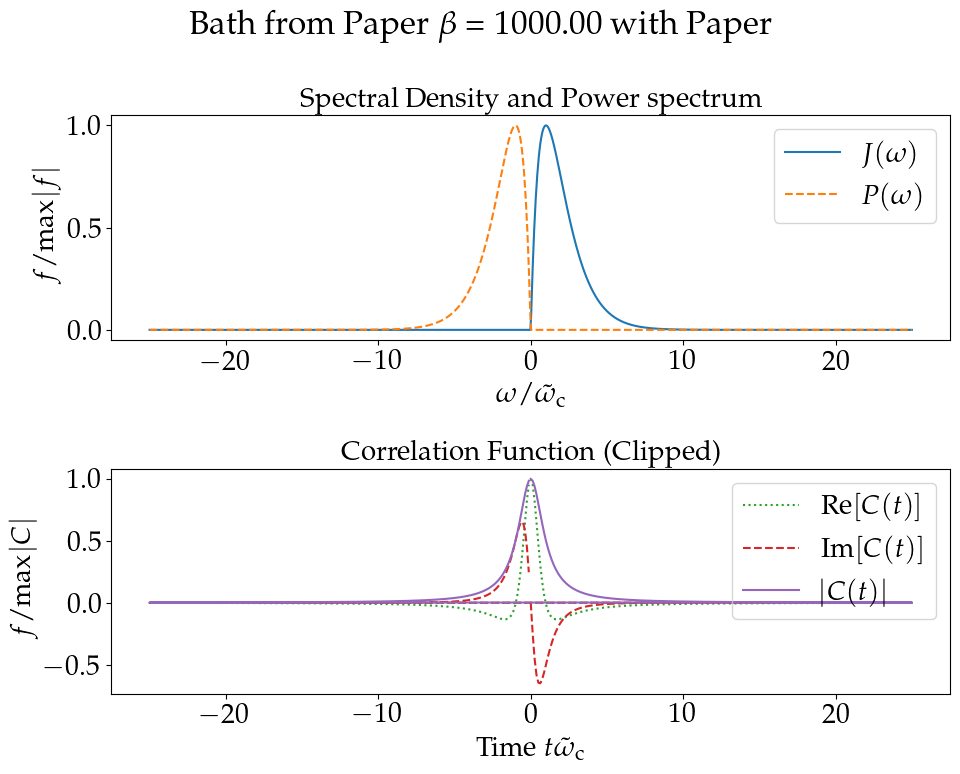

In [41]:
from numpy.fft import ifft, fftfreq, fftshift

###
### BATH FROM PAPER WITH PAPER
###

# ============================= Define frequency and time ranges
frequencies = np.linspace(1 * -25 * wc, 25 * wc, 1000) # Frequency range
normalized_frequencies = frequencies / wc         # Normalize frequencies

### Generate the environment the way the paper does it      AND      ### Calculate Power Spectrum values
spectral_density_vals  = np.array([spectral_density_func_paper(w, args_paper) for w in frequencies])
power_spectrum_vals    = np.array([Power_spectrum_func_paper(w, args_paper) for w in frequencies])
### Fourier Transform of Power Spectrum
# Compute the Fourier Transform of the Power Spectrum
# Compute the Fourier Transform of the Power Spectrum
correlation_vals = np.fft.ifft(np.fft.fftshift(power_spectrum_vals)) # Apply inverse FFT and shift for symmetry
# Generate normalized time values corresponding to the frequencies
time_step        = (frequencies[1] - frequencies[0]) / (2 * np.pi) # Time step based on frequency spacing
normalized_times = (np.fft.fftfreq(len(frequencies), d=time_step)) * wc # Normalize times by wc

max_J     = np.max(np.abs(spectral_density_vals))
max_P     = np.max(np.abs(power_spectrum_vals))
max_corr  = np.max(np.abs(correlation_vals))

### Plot Power Spectrum and its Fourier Transform
plt.figure(figsize=(10, 8))
plt.suptitle(r"Bath from Paper  $\beta$ = " + f"{1/(Boltzmann * T):.2f}" + " with Paper")

### Plot Power Spectrum
plt.subplot(2, 1, 1)
plt.plot(normalized_frequencies, spectral_density_vals / max_J, label=r"$J(\omega)$", color='C0', linestyle='solid')
plt.plot(normalized_frequencies, power_spectrum_vals / max_P, label=r"$P(\omega)$", color='C1', linestyle='dashed')
plt.xlabel(r'$\omega / \tilde{\omega}_{\text{c}}$')
plt.ylabel(r'$f / \text{max}|f|$')#(\tilde{\omega}_{\text{c}})$')
plt.title(r"Spectral Density and Power spectrum")
plt.legend()


### Plot Fourier Transform of Power Spectrum
plt.subplot(2, 1, 2)

# Clip the data to the range of -25 to 25 for better visualization
clip_mask = (normalized_times >= -25) & (normalized_times <= 25)
clipped_times = normalized_times[clip_mask]
clipped_correlation_vals = correlation_vals[clip_mask]

plt.plot(clipped_times, np.real(clipped_correlation_vals) / max_corr, label=r"$\mathrm{Re}[C(t)]$", linestyle="dotted", color='C2')
plt.plot(clipped_times, np.imag(clipped_correlation_vals) / max_corr, label=r"$\mathrm{Im}[C(t)]$", linestyle="dashed", color='C3')
plt.plot(clipped_times, np.abs(clipped_correlation_vals)  / max_corr, label=r"$|C(t)|$", linestyle="solid", color='C4')
plt.xlabel(r'Time $t \tilde{\omega}_{\text{c}}$')
plt.ylabel(r'$f / \text{max}|C|$')
plt.title(r"Correlation Function (Clipped)")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

In [42]:
# =============================
# SYSTEM PARAMETERS
# =============================
N_atoms = 2         # Set the number of atoms
Coupled = False     # Set coupling condition

### Define Atomic States
atom_g, atom_e = basis(2, 0), basis(2, 1)      # Ground, Excited states

### define the laser parameters 
omega_L = 0.48                  # # [fs⁻¹] = 16000 cm-1 / in the middle of the two transitions 
E_freqs = [omega_L] * 3         # Laser frequencies
E0      = .1                     # Amplitude of the laser field #(**changeable*)       
E_amps  = [E0, E0, 1e-1 * E0]   # third one is small to simulate a probe field

### Initialize variables that are shared across cases but may be not used in one
omega_b, mu_b, rabi_0, delta, theta, J = None, None, None, None, None, None

### Coupling to the bath
# Linblad Case
gamma_0, gamma_phi = 1,1#1 / (300), 1 / (100)  #(**changeable**):  Decay and Dephasing rates with MESOLVE

### Rset of the parameters for the two one atom case
if N_atoms != 1 and N_atoms != 2:
    raise ValueError("can only handle 1 or 2 atoms")
elif N_atoms == 1:
    psi_ini = atom_g # initial state

    omega_a = 0.48      # laser is on resonance
    mu_a    = 1         # dipole moment of the transition

    g_value = mu_a * E0 # check, to be done with constant laser couplion f(t) = 1 if the rabi frequency is correct

    H0 = hbar * omega_a * ket2dm(atom_e)
    eigenenergies, eigenstates = H0.eigenstates()

    delta    = omega_a - omega_L
    rabi_0   = g_value / hbar
    rabi_gen = np.sqrt(rabi_0**2 + delta**2)

    pulse_duration = 15

    sm_list  = [mu_a * (atom_g * atom_e.dag()).unit()]
    Deph_op  = -atom_g * atom_g.dag() + atom_e * atom_e.dag()

    SM_op   = sum(sm_list)
    Dip_op  = SM_op + SM_op.dag()

    # a_ops_list = [[ket2dm(atom_e), ohmic_spectrum],]       #  TODO(imp) This one is not working, gives no decay  
    a_ops_list = [[Dip_op, ohmic_env.spectral_density],]
else:
    ### Functions to calculate the diagonal hamiltonian of the 
    def Hamilton_dimer_sys(hbar, omega_a, omega_b, J):
        H = hbar * (omega_a * ket2dm(tensor(atom_e, atom_g))
                    + omega_b * ket2dm(tensor(atom_g, atom_e))
                    + J * (tensor(atom_e, atom_g) * tensor(atom_g, atom_e).dag() + tensor(atom_g, atom_e) * tensor(atom_e, atom_g).dag())
                    + (omega_a + omega_b) * ket2dm(tensor(atom_e, atom_e)))
        return H
    def calc_mu(H, mu_a, mu_b, theta):
        eigenvecs = H.eigenstates()[1]
        mu_10 = -mu_a * np.sin(theta) + mu_b * np.cos(theta)
        sigma_m_10 = mu_10 * (eigenvecs[0] * eigenvecs[1].dag()).unit()

        mu_20 =  mu_a * np.cos(theta) + mu_b * np.sin(theta)
        mu_31 = -mu_b * np.sin(theta) + mu_a * np.cos(theta)
        mu_32 =  mu_b * np.cos(theta) + mu_a * np.sin(theta)

        sigma_m_20 = mu_20 * (eigenvecs[0] * eigenvecs[2].dag()).unit()
        sigma_m_32 = mu_31 * (eigenvecs[1] * eigenvecs[3].dag()).unit()
        sigma_m_31 = mu_32 * (eigenvecs[2] * eigenvecs[3].dag()).unit()

        return [sigma_m_10, sigma_m_20, sigma_m_31, sigma_m_32]

    psi_ini = tensor(atom_g, atom_g) # initial state

    pulse_duration = 5 # fs

    ### If the excited states are coupled -> modify the energy levels
    if Coupled:
        J = 0.009  # fac_twopi * c * 300
        omega_a = 0.486  # fac_twopi * c * 16200
        omega_b = 0.474  # fac_twopi * c * 15800
        mu_a = 1
        mu_b = -0.23
    else:
        J = 0.0
        omega_a = 0.4908  # fac_twopi * c * 16360
        omega_b = 0.4692  # fac_twopi * c * 15640
        mu_a = 1
        mu_b = 2 * mu_a

    theta = np.arctan(2 * J / (omega_a - omega_b)) / 2

    H0 = Hamilton_dimer_sys(hbar, omega_a, omega_b, J)
    eigenenergies, eigenstates = H0.eigenstates()
    sm_list = calc_mu(H0, mu_a, mu_b, theta)

    # Coupling to the environment
    cplng_ops_to_env = [ket2dm(tensor(atom_e, atom_g)), ket2dm(tensor(atom_g, atom_e)), ket2dm(tensor(atom_e, atom_e))]
    #cplng_ops_to_env = [sm for sm in sm_list]
    # Rabi oscillation things / coupling to the laser
    g_value = (mu_a * mu_b) * E0 # TODO check.  this might lead to a uncorrect rabi period
    rabi_0   = g_value / hbar
    rabi_gen = np.sqrt(rabi_0**2) # Not really the rabi freq, because i dont really take detuning into account, because i have 2 atoms
    
    Deph_op =  tensor(-atom_g* atom_g.dag() + atom_e* atom_e.dag(), qeye(2)) + tensor(qeye(2), -atom_g* atom_g.dag() + atom_e* atom_e.dag())
    #Deph_op = -eigenstates[0] * eigenstates[0].dag() + sum([state * state.dag() for state in eigenstates[1:]]) # TODO now sure which one is correct

    """def Corr_fct(w):
            if w > 0:
                return n(w) * ohmic_spectrum(w)
            elif w < 0:
                return (1 + n(-w)) * ohmic_spectrum(-w)
            else:
                return g**2 / (wc * (Boltzmann * T)**-1)
        def gamma_ab(w):
            return np.sin(2 * theta)**2 * Corr_fct(w)
        Gamma_ab = 2 * np.cos(2 * theta)**2 * Corr_fct(0)
        decay_rates = [gamma_ab(wa - wb) for wa in eigenenergies for wb in eigenenergies] + [Gamma_ab] * 4
        #decay_rates = [rate for rate in decay_rates if rate != 0] # Remove zero rates
        #print(decay_rates)"""

    # Actually as in the paper
    a_ops_list = [
        [cplng_ops_to_env[0], lambda w: spectral_density_func_paper(w, args_paper)],  # First operator with ohmic_spectrum
        [cplng_ops_to_env[1], lambda w: spectral_density_func_paper(w, args_paper)],  # Second operator with ohmic_spectrum
        [cplng_ops_to_env[2], lambda w: spectral_density_func_paper(2* w, args_paper)]  # Third operator with 2 * ohmic_spectrum TODO THIS RESULTS IN NEGATIVE probability!!!!!
    ]

print(a_ops_list)

SM_op   = sum(sm_list)
Dip_op  = SM_op + SM_op.dag()

t_max_L = 6 * 2 * np.pi / omega_L # Just the six periods of the laser rotation
t_prd   = 2 * np.pi / rabi_gen
t_max_r = max(600, 5 * t_prd)           #(**changeable**) # 5 periods of the rabi oscillation
t_max   = t_max_r
fine_spacing = .5* t_prd
Delta_ts = [pulse_duration / 2] * 3
print("Period for one Rabi oscillation: T/fs  = ", t_prd)

c_ops_list = [np.sqrt(gamma_phi) * Deph_op]#np.sqrt(gamma_0) * SM_op]#, 
e_ops_list   = [ket2dm(v) for v in H0.eigenstates()[1]]
e_ops_labels = [f"|{i}"+r"$\rangle$" for i in range(len(H0.eigenstates()[1]))]

[[Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]], <function <lambda> at 0x0000019C67061A80>], [Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], <function <lambda> at 0x0000019C67060CC0>], [Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]], <function <lambda> at 0x0000019C67060540>]]
Period for one Rabi oscillation: T/fs  =  31.41592653589793


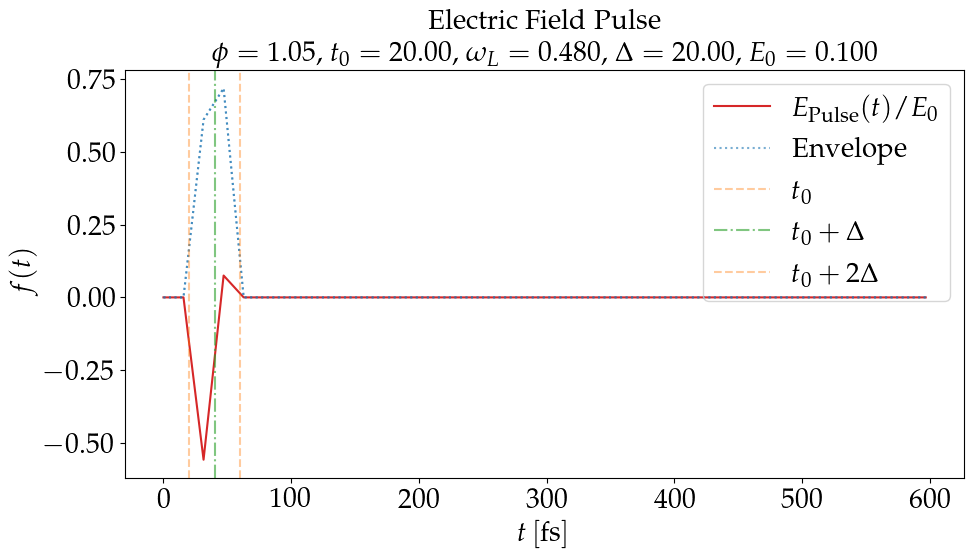

 Total run time:   2.87s*] Elapsed 2.87s / Remaining 00:00:00:00
 Total run time:   3.86s*] Elapsed 3.86s / Remaining 00:00:00:00


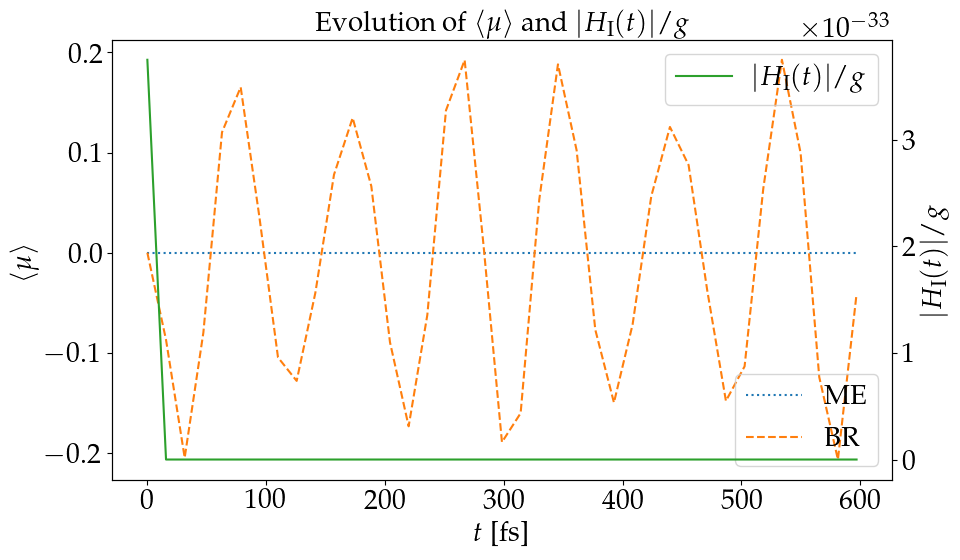

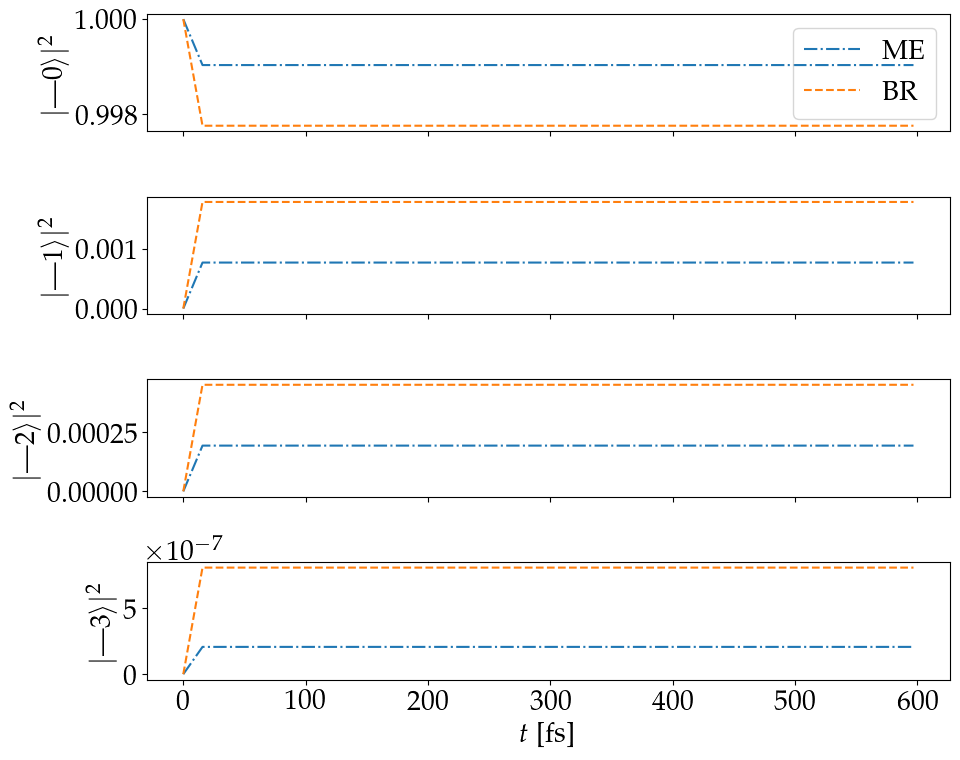

In [43]:
# =============================
# MORE FUNCTIONS
# =============================
def plot_positive_color_map(datas, T=np.inf, space="real", type="real", positive=False, safe=False, output_dir=None): 
    """
    Create a color plot of 2D functional data for positive x and y values only.

    Parameters:
        datas (tuple): Tuple containing (x, y, data) where x and y are 1D arrays and data is a 2D array.
        T (float): Temperature parameter to include in plot title and file name.
        space (str): Either 'real' or 'freq' specifying the space of the data.
        type (str): Type of data ('real', 'imag', 'abs', or 'phase'). Used only if space="freq".
        positive (bool): Whether to use only positive values of x and y.
        safe (bool): If True, saves the plot to a file.
        output_dir (str, optional): Directory to save the plot.

    Returns:
        None
    """
    # Ensure datas is a tuple with (x, y, data)
    if not isinstance(datas, tuple) or len(datas) != 3:
        raise ValueError("datas must be a tuple of (x, y, data)")

    x, y, data = datas

    # Validate that x, y, and data are numpy arrays
    x    = np.array(x)
    y    = np.array(y)
    data = np.array(data)

    # Check if data dimensions match x and y
    if data.shape[1] != len(x):
        raise ValueError(f"Length of x ({len(x)}) must match the number of columns in data ({data.shape[1]}).")
    if data.shape[0] != len(y):
        raise ValueError(f"Length of y ({len(y)}) must match the number of rows in data ({data.shape[0]}).")

    # Filter for positive x and y values if requested
    if positive:
        positive_x_indices = np.where(x > 0)[0]
        positive_y_indices = np.where(y > 0)[0]
        x    = x[positive_x_indices]
        y    = y[positive_y_indices]
        data = data[np.ix_(positive_y_indices, positive_x_indices)]

    # Set the label and title based on the space
    label = r"$\propto E_{\text{out}} / \mu_{\text{a}}$"

    if space != "real" and space != "freq":
        raise ValueError("Invalid space. Must be 'real' or 'freq'.")
    elif space == "real":
        colormap = "viridis"
        title    = r"$\text{Real space 2D Spectrum}$"
        if T != np.inf:
            title += f" \text{{at}} T ={T:.2f}"
        x_title = r"$t_{\text{det}}$ [fs]"
        y_title = r"$\tau_{\text{coh}}$ [fs]"
    elif space == "freq":
        x        = x * 10 / 3
        y        = y * 10 / 3
        colormap = "plasma"
        if type == "real":
            title = r"$\text{Freq space, Real 2D Spectrum}$"
            data  = np.real(data)
        elif type == "imag":
            title = r"$\text{Freq space, Imag 2D Spectrum}$"
            data  = np.imag(data)
        elif type == "abs":
            title = r"$\text{Freq space, Abs 2D Spectrum}$"
            data  = np.abs(data)
        elif type == "phase":
            title = r"$\text{Freq space, Phase 2D Spectrum}$"
            data  = np.angle(data)
        else:
            raise ValueError("Invalid Type. Must be 'real', 'imag', 'abs', or 'phase'.")
        
        if T != np.inf:
            title += f" \text{{at}} T ={T:.2f}"

        x_title = r"$\omega_{t_{\text{det}}}$ [$10^4$ cm$^{-1}$]"
        y_title = r"$\omega_{\tau_{\text{coh}}}$ [$10^4$ cm$^{-1}$]"

    # Plot the color map
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(x, y, data / mu_a, shading="auto", cmap=colormap)    # (**changeable**)
    plt.colorbar(label=label)
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)

    # Save the plot if safe is True and output_dir is provided
    if safe and output_dir is not None:
        assert os.path.isdir(output_dir), f"Output directory {output_dir} does not exist."

        filename_parts = [
            f"N={N_atoms}",
            f"mua={mu_a:.0f}",
            f"E0={E0:.2e}",
            f"wa={omega_a:.2f}",
            f"wL={omega_L / omega_a:.1f}wa",
            f"rabigen={rabi_gen:.2f}= sqrt({rabi_0:.2f}^2+{delta:.2f}^2)",             
            f"pos={positive}",
            f"space={space}"
        ]

        if N_atoms == 1:
            filename_parts.append(f"g0={gamma_0:.3f}gphi={gamma_phi:.3f}")  # TODO Only add for MESOLVE!!! Add only for N_atoms = 1

        if N_atoms == 2 and J is not None:
            filename_parts.insert(1, f"J_{J:.1f}")
            
        if space == "freq":
            filename_parts.append(f"type_{type}")

        file_name_combined = "_".join(filename_parts) + ".svg"
        save_path_combined = os.path.join(output_dir, file_name_combined)
        plt.savefig(save_path_combined)
    else:
        print("Plot not saved. Ensure 'safe' is True and 'output_dir' is specified.")

    plt.show()
def Plot_example_evo(T_val, tau, phi_1, phi_2, times_0, times_1, times_2, data_1, data_2, data_f, i, j, k):
    """
    Plot the evolution of the electric field and expectation values for a given tau and T.

    Parameters:
        T_val (float): Waiting time.
        tau (float): Coherence time.
        phi_1 (float): Phase of the first pulse.
        phi_2 (float): Phase of the second pulse.
        times_0, times_1, times_2 (array): Time ranges for the three pulses.
        data_1, data_2, data_f (qutip.Result, "Solver"): Results of the three pulses.
        i, j, k (int): Indices for the respective times.

    Returns:
        None
    """
    Solver = data_1[1]
    ### Define pulse arguments
    args0 = get_pulse_args(times_0[0], phi_1, 0)
    args1 = get_pulse_args(times_0[i], phi_2, 1)
    args2 = get_pulse_args(times_1[j-i], 0, 2)
    E00   = args0['E_amp'] # Amplitude of the first pulse

    ### Split time ranges for each pulse
    times1 = times_0[:i]
    times2 = times_1[:j]
    times3 = times_2

    ### Calculate the electric fields for each time range
    E_1 = [(np.real(El_field_pulse(t, args0) + np.conj(El_field_pulse(t, args0))) / (2*E00)) for t in times1]
    E_2 = [(np.real(El_field_pulse(t, args1) + np.conj(El_field_pulse(t, args1))) / (2*E00)) for t in times2]
    E_3 = [(np.real(El_field_pulse(t, args2) + np.conj(El_field_pulse(t, args2))) / (2*E00)) for t in times3]

    ### Combine time ranges and electric fields
    times_plot = np.concatenate([times1, times2, times3])
    E_total    = E_1 + E_2 + E_3

    ### Create subplots
    fig, axs = plt.subplots(len(e_ops_list) + 1, 1, figsize=(15, 10), sharex=True)

    ### Plot the electric field
    axs[0].plot(times_plot, E_total, label='Electric Field (Real part)', color='C0', linestyle='solid')
    axs[0].set_ylabel(r'$E$') # Label for the electric field
    axs[0].axvline(times_0[0] + Delta_ts[0], color='C1', linestyle='dashed', label='Pulse 1') # Mark Pulse 1
    axs[0].axvline(times_0[i] + Delta_ts[1], color='C2', linestyle='dashdot', label='Pulse 2') # Mark Pulse 2
    axs[0].axvline(times_1[j-i] + Delta_ts[2], color='C3', linestyle='dotted', label='Pulse 3') # Mark Pulse 3
    #axs[0].axvline(times_2[k], color='C4', linestyle='solid', label='Detection') # Mark Detection
    axs[0].legend() # Add legend

    ### Initialize an empty list to store all the data for plotting
    datas = []

    ### Append the data for each quantum state based on the times
    for idx in range(len(e_ops_list)):
        datas.append(np.concatenate([data_1[0].expect[idx][:i], data_2[0].expect[idx][:j], data_f[0].expect[idx]]))

    ### Loop over the datas and plot each expectation value
    for idx, (data, label) in enumerate(zip(datas, e_ops_labels)):
        axs[idx + 1].plot(times_plot, data, label=Solver + label, color=f'C0', linestyle='solid')
        axs[idx + 1].set_ylabel(fr"$|\text{{{label}}}|^2$")
        axs[idx + 1].legend()

    fig.suptitle(rf"$\tau = {tau:.2f}, T = {T_val:.2f}$")
    axs[-1].set_xlabel(r'$t \, [\text{fs}]$')
    plt.show()
def Plot_example_evo_with_DipOp(T_val, tau, phi_1, phi_2, times_0, times_1, times_2, data_1, data_2, data_f, i, j, k):
    """
    Plot the evolution of the electric field and the expectation value of the dipole operator for a given tau and T.

    Parameters:
        T_val (float): Waiting time.
        tau (float): Coherence time.
        phi_1 (float): Phase of the first pulse.
        phi_2 (float): Phase of the second pulse.
        times_0, times_1, times_2 (array): Time ranges for the three pulses.
        data_1, data_2, data_f (qutip.Result): Results of the three pulses.
        i, j, k (int): Indices for the respective times.

    Returns:
        None
    """
    Solver = data_1[1]
    ### Define pulse arguments
    args0 = get_pulse_args(times_0[0], phi_1, 0)
    args1 = get_pulse_args(times_0[i], phi_2, 1)
    args2 = get_pulse_args(times_1[j-i], 0, 2)
    E00   = args0['E_amp'] # Amplitude of the first pulse

    ### Split time ranges for each pulse
    times1 = times_0[:i]
    times2 = times_1[:j]
    times3 = times_2

    ### Calculate the electric fields for each time range
    E_1 = [(np.real(El_field_pulse(t, args0) + np.conj(El_field_pulse(t, args0))) / (2*E00)) for t in times1]
    E_2 = [(np.real(El_field_pulse(t, args1) + np.conj(El_field_pulse(t, args1))) / (2*E00)) for t in times2]
    E_3 = [(np.real(El_field_pulse(t, args2) + np.conj(El_field_pulse(t, args2))) / (2*E00)) for t in times3]

    ### Combine time ranges and electric fields
    times_plot = np.concatenate([times1, times2, times3])
    E_total    = E_1 + E_2 + E_3

    ### Create subplots
    fig, axs = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

    ### Plot the electric field
    axs[0].plot(times_plot, E_total, label=r"$\frac{E(t)}{E_0^0}$", color='C0', linestyle='solid')
    axs[0].set_ylabel(r'$E$') # Label for the electric field
    axs[0].axvline(times_0[0] + Delta_ts[0], color='C1', linestyle='dashed', label='1') # Mark Pulse 1
    axs[0].axvline(times_0[i] + Delta_ts[1], color='C2', linestyle='dashdot', label='2') # Mark Pulse 2
    axs[0].axvline(times_1[j-i] + Delta_ts[2], color='C3', linestyle='dotted', label='3') # Mark Pulse 3
    #axs[0].axvline(times_2[k], color='C4', linestyle='solid', label='Detection') # Mark Detection
    axs[0].legend() # Add legend

    ### Calculate the expectation values of the dipole operator
    expect_1 = [expect(Dip_op, state) for state in data_1[0].states[:i]]
    expect_2 = [expect(Dip_op, state) for state in data_2[0].states[:j]]
    expect_f = [expect(Dip_op, state) for state in data_f[0].states]
    dipole_expectation = np.concatenate([expect_1, expect_2, expect_f])

    ### Plot the expectation values
    axs[1].plot(times_plot,dipole_expectation, label=r"$\langle \mu \rangle$", color='C0', linestyle='solid')
    axs[1].set_ylabel(r'$\langle \mu \rangle$')
    ### Set title and labels
    fig.suptitle(rf"$\tau = {tau:.2f}, T = {T_val:.2f}$")
    axs[1].set_xlabel(r'$t \, [\text{fs}]$')
    plt.show()
def get_t_tau_times_for_T(T_val, spacing):
    """
    Calculate the time arrays for tau and t based on the waiting time T_val and spacing.

    Parameters:
        T_val (float): Waiting time.
        spacing (float): Time spacing.

    Returns:
        tuple: Arrays for tau and t times.
    """
    ### Calculate the first and last entries for tau times
    first_tau = Delta_ts[0] + Delta_ts[1]
    last_tau  = np.floor((t_max - Delta_ts[2] - T_val - Delta_ts[0]) / spacing) * spacing
    times_tau = np.arange(first_tau, last_tau, spacing)

    ### Calculate the first and last entries for t times
    first_t = Delta_ts[2]
    last_t  = np.floor((t_max - Delta_ts[0] - T_val - 2 * Delta_ts[2]) / spacing) * spacing
    times_t = np.arange(first_t, last_t, spacing)

    return times_tau, times_t
def get_pulse_args(t, phi, i):
    """
    Generate pulse arguments based on the current time, phase, and pulse index.

    Parameters:
        t (float): Start time of the pulse.
        phi (float): Phase of the pulse.
        i (int): Index of the pulse (0, 1, or 2).

    Returns:
        dict: Dictionary containing pulse parameters.
    """
    #    if N_atoms == 2 and Coupled: #       E_amp = E_amps[i] * np.sqrt(2) # Adjust amplitude for coupled two-atom system    #   else:

    E_amp = E_amps[i] # Use default amplitude

    return {
        'phi': phi,           # Phase kick
        'time': t,            # Start time
        'omega': E_freqs[i],  # Frequency
        'Delta': Delta_ts[i], # Pulse width
        'E_amp': E_amp        # Amplitude
    }
def pulse_envelope(t, t0, Delta):
    """
    Calculate the pulse envelope for a given time, start time, and width.

    Parameters:
        t (float): Time at which the envelope is evaluated.
        t0 (float): Start time of the pulse.
        Delta (float): Pulse width parameter.

    Returns:
        float: Envelope value at time t.
    """
    # Pulse envelope: starts at t0, has a width of 2 * Delta, and is centered at t0 + Delta
    if t < t0 or t > t0 + 2 * Delta:
        return 0.0 # Outside the pulse range, envelope is zero
    else:
        return np.cos(np.pi * (t - (t0 + Delta)) / (2 * Delta))**2
def El_field_pulse(t, args):
    """
    Define a time-dependent electric field pulse.

    Parameters:
        t (float): Time at which the electric field is evaluated.
        args (dict): Dictionary containing pulse parameters:
            - 'time': Start time of the pulse.
            - 'Delta': Pulse width parameter.
            - 'omega': Frequency of the pulse.
            - 'phi': Phase of the pulse.
            - 'E_amp': Amplitude of the pulse.

    Returns:
        complex: Electric field value at time t.
    """
    t0    = args['time']  # Start time of the pulse
    Delta = args['Delta'] # Pulse width
    omega = args['omega'] # Frequency
    phi   = args['phi']   # Phase
    E0    = args['E_amp'] # Amplitude

    ### Calculate the pulse envelope
    Env = pulse_envelope(t, t0, Delta)

    ### Determine if Rotating Wave Approximation (RWA) is used
    RWA = False  # (**changeable**) # only valid for omega_L ~ omega_a ~ omega_b

    if RWA:
        E = np.exp(-1j * phi) # Simplified electric field under RWA
    else:
        E = np.exp(-1j * (omega * t + phi)) # General case

    return E0 * Env * E

# Test function to plot the electric field
def plot_pulse_envelope(times, t0, Delta, ax=None):
    """
    Plot the pulse envelope over time.

    Parameters:
        times (array): Array of time values.
        t0 (float): Start time of the pulse.
        Delta (float): Pulse width parameter.
        ax (matplotlib.axes.Axes, optional): Axes object to plot on. Defaults to None.

    Returns:
        ax (matplotlib.axes.Axes): Axes object with the plot.
    """
    envelope = [pulse_envelope(t, t0, Delta) for t in times]
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(times, envelope, label=r"$\text{Envelope}$", linestyle='dotted', alpha=0.6, color='C0')  # Semi-transparent line
    ax.plot(times, envelope,                             linestyle='dotted', alpha=0.6, color='C0')  # Semi-transparent line
    ax.axvline(t0, linestyle='dashed', label=r"$t_0$", alpha=0.4, color='C1')  # Start time
    ax.axvline(t0 + Delta, linestyle='dashdot', label=r"$t_0 + \Delta$", alpha=0.6, color='C2')  # Midpoint
    ax.axvline(t0 + 2 * Delta, linestyle='dashed', label=r"$t_0 + 2\Delta$", alpha=0.4, color='C1')  # End time
    return ax
def plot_El_field_pulse(times, args):
    """
    Plot the electric field pulse over time.

    Parameters:
        times (array): Array of time values.
        args (dict): Dictionary containing pulse parameters.

    Returns:
        None
    """
    t0    = args['time']
    Delta = args['Delta']
    E0    = args['E_amp']
    El_field_pulse_data = [np.real(El_field_pulse(t, args) + np.conj(El_field_pulse(t, args))) / (2 * E0) for t in times]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(times, El_field_pulse_data, linestyle='solid', label=r"$E_{\text{Pulse}}(t) / E_0$", color='C3')
    ax = plot_pulse_envelope(times, t0, Delta, ax=ax)
    
    ax.set_xlabel(r'$t \, [\text{fs}]$')
    ax.set_ylabel(r'$f(t)$')
    ax.set_title(r'$\text{Electric Field Pulse}$' + 
    f"\n$\\phi={args['phi']:.2f}$, $t_0={args['time']:.2f}$, $\\omega_L={args['omega']:.3f}$, $\\Delta={args['Delta']:.2f}$, $E_0={args['E_amp']:.3f}$")
    ax.legend(loc='upper right')
    plt.show()

## Calculations to compute one 2D polarization (adjustable, to use BRMESOLVE or MESOLVE)
def compute_pulse(psi_ini, times, phi, i):
    """
    Compute the evolution of the i-th pulse starting from the current state psi_ini.

    Parameters:
        psi_ini (Qobj): Initial quantum state.
        times (array): Time array for the evolution.
        phi (float): Phase kick for the pulse.
        i (int): Index of the pulse (0, 1, or 2).

    Returns:
        tuple: Result of the evolution and the solver used.
    """
    Solver = "BR"  # (**changeable**) Choose between "BR" (Bloch-Redfield) or "ME" (Master Equation)

    ### Set options for the solver
    progress_bar = 'enhanced' if i == 2 and times[0] >= times[len(times) // 2] else ""  # Enhanced progress bar for the last pulse
    options      = {'store_states': True, 'progress_bar': progress_bar}  # Store states for further analysis

    ### Get pulse arguments
    args = get_pulse_args(times[0], phi, i)

    ### Choose solver and compute the evolution
    if Solver == "BR":
        result = brmesolve(H_sys(args), psi_ini, times, e_ops=e_ops_list, a_ops=a_ops_list, options=options)
    else:
        result = mesolve(H_sys(args), psi_ini, times, e_ops=e_ops_list, c_ops=c_ops_list, options=options)

    return result, Solver

def compute_two_dimensional_polarization(T_val, phi_1, phi_2):
    ### Compute Two-Dimensional Polarization for a given waiting time T_val and the two pulse phases phi_1, phi_2 for the 1st and 2nd pulse respectively

    # get the symmetric times, t / tau
    tau_values, t_values = get_t_tau_times_for_T(T_val, fine_spacing)


    # TODO OPTIMIZATION: Implement a function COMPUTE expect(Dip_op, psi_f) for one combination of T_val tau_val, t_val, phi_1, phi_2
    # Then call this function for every combination
    # This would allow me to parralel process via cutip and also significantly reduce the comp time?

    # initialize the time domain Spectroscopy
    data = np.zeros((len(tau_values), len(t_values)))

    # only make the necessary steps (don't calculate too many states that we don't need)
    index_0 = np.abs(times - (tau_values[-1] - Delta_ts[1] + Delta_ts[0])).argmin()  # Find the closest index to reduce computation time
    # select range  ->  to reduce computation time
    times_0 = times[:index_0+1]

    # calculate the evolution of the first pulse in the desired range for tau
    #print(f"For pulse 1: args = ", get_pulse_args(times_0[0], phi_1, 0))
    
    data_1  = compute_pulse(psi_ini, times_0, phi_1, i = 0)

    # for every tau value -> calculate the next pulses
    for tau_idx, tau in enumerate(tau_values):
        # find the position in times, which corresponds to the current tau
        i       = np.abs((times_0 + Delta_ts[1] - Delta_ts[0]) - tau).argmin()

        # take this state and evolve it with the second pulse, but only as far as desired
        psi_1   = data_1[0].states[i]

        # select range  ->  to reduce computation time
        j = np.abs((times - times_0[i] - Delta_ts[1] + Delta_ts[2]) - T_val).argmin()
        times_1 = times[i:j+1]

        # compute second pulse for waiting time T
        data_2  = compute_pulse(psi_1, times_1, phi_2, i = 1)
        psi_2   = data_2[0].states[j-i]

        # compute the last pulse with times t
        times_2 = times[j:]
        data_f  = compute_pulse(psi_2, times_2, phi = 0, i = 2) # the last pulse has fixed phase 0
        for t_idx, t in enumerate(t_values):
            # store the data for the case
            if t_idx + tau_idx < len(tau_values):

                k = np.abs(t_values[t_idx] - (times_2 - times_2[0] - Delta_ts[2])).argmin()
                psi_f = data_f[0].states[k]
                data[tau_idx, t_idx] = expect(Dip_op, psi_f)

                # make one plot for this case
                if t == t_values[len(t_values)//2] and tau == tau_values[len(tau_values)//3]:
                    Plot_example_evo_with_DipOp(T_val, tau, phi_1, phi_2, times_0, times_1, times_2, data_1, data_2, data_f, i, j, k)
                    Plot_example_evo(T_val, tau, phi_1, phi_2, times_0, times_1, times_2, data_1, data_2, data_f, i, j, k)
    return tau_values, t_values, data
# functions to parallel process / compute a 2D polarization 
def process_one_combination(phi_1, phi_2, times_T):
    # Function to handle parallel processing for each phi1, phi2 combination
    full_data_array = np.empty((len(times_T)), dtype=object)
    with ProcessPoolExecutor() as executor:
        futures = [executor.submit(compute_two_dimensional_polarization, times_T[i], phi_1, phi_2) for i in range(len(times_T))]
        for i, future in enumerate(as_completed(futures)):
            full_data_array[i] = future.result()
    return full_data_array
def parallel_process_all_combinations(phases, times_T):
    # Call the function to parallelize the whole process
    all_results = {}
    with ProcessPoolExecutor() as executor:
        futures = [(executor.submit(process_one_combination, phi1, phi2, times_T), phi1, phi2) for phi1, phi2 in itertools.product(phases, phases)]
        for future, phi1, phi2 in futures:
            all_results[(phi1, phi2)] = future.result()
    return all_results
def average_the_results(results, times_T):
    # the time data can even be padded
    num_combinations = len(results)
    num_time_steps = len(times_T) - 1
    averaged_data_array = np.empty(num_time_steps, dtype=object)
    for i in range(num_time_steps):
        sum_data = None
        ts, taus = None, None
        for _, full_data_array in results.items():
            ts, taus, data_time = full_data_array[i]
            if sum_data is None:
                sum_data = np.zeros_like(data_time)
            sum_data += data_time
        averaged_data = sum_data / num_combinations
        pad_val = 1
        padded_size = (int(np.round(averaged_data.shape[0] * pad_val)), int(np.round(averaged_data.shape[1] * pad_val)))
        padded_averaged_data = np.pad(averaged_data, ((0, padded_size[0] - averaged_data.shape[0]), (0, padded_size[1] - averaged_data.shape[1])), mode='constant', constant_values=0)
        padded_ts = np.linspace(ts[0], np.round(ts[-1] * pad_val), padded_size[1])
        padded_taus = np.linspace(taus[0], np.round(taus[-1] * pad_val), padded_size[0])
        averaged_data_array[i] = (padded_ts, padded_taus, padded_averaged_data)
    return averaged_data_array
def get_all_results(phases, times_T):
    all_results = parallel_process_all_combinations(phases, times_T)
    sorted_results = {k: sorted(v, key=lambda data_item: len(data_item[0]), reverse=True)[:-1] for k, v in all_results.items()}
    averaged_results = average_the_results(sorted_results, times_T)
    return averaged_results
def extend_and_plot_results(averaged_results):
    global_ts        = averaged_results[0][0]
    global_taus      = averaged_results[0][1]
    global_t_freqs   = np.fft.fftfreq(len(global_ts), d=(global_ts[1] - global_ts[0]))
    global_tau_freqs = np.fft.fftfreq(len(global_taus), d=(global_taus[1] - global_taus[0]))
    global_data_time = np.zeros((len(global_taus), len(global_ts)))
    global_data_freq = np.zeros((len(global_taus), len(global_ts)), dtype=np.complex64)

    def find_closest_index(local_times, global_times):
        return [np.argmin(np.abs(global_times - local_time)) for local_time in local_times]

    for i, datas in enumerate(averaged_results):
        (ts, taus, data_time)
        data_extended_time = np.zeros_like(global_data_time)
        tau_indices = find_closest_index(datas[1], global_taus)
        t_indices = find_closest_index(datas[0], global_ts)
        for local_tau_idx, global_tau_idx in enumerate(tau_indices):
            for local_t_idx, global_t_idx in enumerate(t_indices):
                data_extended_time[global_tau_idx, global_t_idx] = datas[2][local_tau_idx, local_t_idx]
        data_extended_freq = np.fft.fft2(data_extended_time)
        global_data_time += data_extended_time
        global_data_freq += data_extended_freq
        plot_positive_color_map(datas, times_T[i])
        plot_positive_color_map((global_t_freqs, global_tau_freqs, data_extended_freq), times_T[i], space="freq", positive=True, type="abs")

    global_data_time /= len(averaged_results)
    global_data_freq /= len(averaged_results)
    plot_positive_color_map((global_ts, global_taus, global_data_time), safe=False)
    plot_positive_color_map((global_t_freqs, global_tau_freqs, global_data_freq), space="freq", type="abs", positive=True, safe=False)
    return global_data_time, global_data_freq

# =============================
# SYSTEM HAMILTONIAN
# =============================

# Get the full system Hamiltonian with the interaction Hamiltonian, with and without (adjustable) Rotating Wave Approximation (RWA)
def H_int(t, args):  
    """
    Define the interaction Hamiltonian for the system.

    Parameters:
        t (float): Time at which the interaction Hamiltonian is evaluated.
        args (dict): Dictionary containing pulse parameters:
            - 'E_amp': Amplitude of the electric field.
            - Other parameters required for the electric field pulse.

    Returns:
        Qobj: Interaction Hamiltonian at time t.
    """
    RWA = False  # (**changeable**) # Set to True to use Rotating Wave Approximation

    E0 = args['E_amp']  # Electric field amplitude

    # Determine coupling strength g
    if N_atoms == 1:
        g = E0 * mu_a  # Coupling strength for a single atom
    else:  # For two atoms
        g = E0 * (mu_a * mu_b)

    # Compute the electric field term
    E_field = El_field_pulse(t, args)

    if RWA:
        # RWA: Valid only for omega_L ~ omega_a ~ omega_b
        return g * (SM_op.unit() / 2 * (E_field / E0) +
                    SM_op.dag().unit() / 2 * np.conj(E_field / E0))
    else:
        # No RWA: General case
        return g * Dip_op.unit() * (E_field + np.conj(E_field)) / (2 * E0)
def H_sys(args):
    """
    Define the system Hamiltonian as the atomic Hamiltonian plus the dipole interaction with the electric field.

    Parameters:
        args (dict): Dictionary containing pulse parameters.

    Returns:
        QobjEvo: Time-dependent system Hamiltonian.
    """
    return H0 + QobjEvo(H_int, args)

### DEBUGGING
# Compute and display only the first pulse
def test_evo_of_first_pulse(test_args, times, e_ops_list, e_ops_labels, g_value):
    """
    Test the evolution of the first pulse using both ME and BR solvers.
    Plot the expectation values and interaction Hamiltonian norm.
    """
    progress_bar = 'enhanced'
    options      = {'store_states': True, 'progress_bar': progress_bar} # Save the states for further analysis

    # Solve using ME and BR solvers
    result_me = mesolve(H_sys(test_args), psi_ini, times, c_ops=c_ops_list, e_ops=e_ops_list, options=options)
    result_br = brmesolve(H_sys(test_args), psi_ini, times, a_ops=a_ops_list, e_ops=e_ops_list, options=options)

    # Plot the expectation values of Dip_op and the norm of H_int
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.plot(times, expect(Dip_op, result_me.states), label=r"ME", linestyle='dotted', color='C0') # ME solver
    ax1.plot(times, expect(Dip_op, result_br.states), label=r"BR", linestyle='dashed', color='C1') # BR solver
    ax1.set_xlabel(r"$t$ [fs]")
    ax1.set_ylabel(r"$\langle \mu \rangle$")
    ax1.legend(loc="lower right")

    ax2 = ax1.twinx()
    ax2.plot(times, [H_int(t, test_args).norm() / g_value for t in times], label=r"$|H_\text{I}(t)|/g$", linestyle='solid', color='C2') # Interaction norm
    ax2.set_ylabel(r"$|H_\text{I}(t)|/g$")
    ax2.legend(loc="upper right")

    plt.title(r"Evolution of $\langle \mu \rangle$ and $|H_\text{I}(t)|/g$")
    plt.tight_layout()
    plt.show()

    # Plot the expectation values for all operators
    fig, axes = plt.subplots(len(e_ops_list), 1, figsize=(10, 8), sharex=True)

    for idx, ax in enumerate(axes):
        ax.plot(times, result_me.expect[idx], label=r"ME" if idx == 0 else None, linestyle='dashdot', color=f'C0') # ME solver
        ax.plot(times, result_br.expect[idx], label=r"BR" if idx == 0 else None, linestyle='dashed', color=f'C1') # BR solver
        ax.set_ylabel(fr"$|\text{{{e_ops_labels[idx]}}}|^2$")
        if idx == 0:
            ax.legend() # Add legend only for the first subplot

    plt.xlabel(r"$t$ [fs]")
    plt.tight_layout()
    plt.show()
# Compute the data for a fixed tau and T
def compute_fixed_tau_T(tau, T, phi_1, phi_2):
    """
    Compute the data for a fixed tau and T.

    Parameters:
        tau (float): Coherence time.
        T (float): Waiting time.
        phi_1 (float): Phase of the first pulse.
        phi_2 (float): Phase of the second pulse.

    Returns:
        tuple: Time values and corresponding data.
    """
    ### Define the time range for t values
    t_values = np.arange(Delta_ts[2], t_max - T - tau - Delta_ts[0], fine_spacing)

    ### Initialize the time domain spectroscopy
    data = np.zeros(len(t_values))

    ### Compute the evolution of the first pulse
    index_0 = np.abs(times - (tau - Delta_ts[1] + Delta_ts[0])).argmin() # Find the closest index for tau
    times_0 = times[:index_0+1] # Select the range to reduce computation time
    data_1  = compute_pulse(psi_ini, times_0, phi_1, 0)[0]

    ### Compute the evolution of the second pulse
    i     = np.abs((times_0 + Delta_ts[1] - Delta_ts[0]) - tau).argmin() # Find the index for tau
    psi_1 = data_1.states[i] # State after the first pulse

    j       = np.abs((times - times_0[i] - Delta_ts[1] + Delta_ts[2]) - T).argmin() # Find the index for T
    times_1 = times[i:j+1] # Select the range to reduce computation time
    data_2  = compute_pulse(psi_1, times_1, phi_2, 1)[0]

    ### Compute the evolution of the third pulse
    psi_2   = data_2.states[j-i] # State after the second pulse
    times_2 = times[j:] # Remaining time range
    data_f  = compute_pulse(psi_2, times_2, 0, 2)[0] # Third pulse with fixed phase 0

    ### Calculate the expectation values
    for t_idx, t in enumerate(t_values):
        k      = np.abs(t_values[t_idx] - (times_2 - times_2[0] - Delta_ts[2])).argmin() # Find the index for t
        psi_f  = data_f.states[k] # State after the third pulse
        data[t_idx] = expect(Dip_op, psi_f) # Compute the expectation value

    return t_values, data

# Plot the data for a fixed tau and T
def plot_fixed_tau_T(tau, T, phi_1, phi_2):
    """Plot the data for a fixed tau and T."""
    t_values, data = compute_fixed_tau_T(tau, T, phi_1, phi_2)
    plt.figure(figsize=(10, 6))
    plt.plot(t_values, np.abs(data), label=r"$|\langle \mu \rangle|$")
    plt.xlabel(r'$t \, [\text{fs}]$')
    plt.ylabel(r'$|\langle \mu \rangle|$')
    plt.title(r'Expectation Value of $|\langle \mu \rangle|$ for fixed $\tau$ and $T$ (T=1000, $\tau=300$)')
    plt.legend()
    plt.show()

# Print the values
test_args = get_pulse_args(0,0,0)
times     = np.arange(0, t_max, fine_spacing)   # High-resolution times array to do the evolutions

#################
# TEST with one (maybe constant pulse)
##################
plot_El_field_pulse(times, args = {'phi': np.pi/3, 'time': 0.1*t_max/3, 'omega': E_freqs[0], 'Delta': 1*t_max/30, 'E_amp': E_amps[0]})
test_evo_of_first_pulse(test_args, times, e_ops_list, e_ops_labels, g_value)

In [ ]:
# Test the function and plot the data
#t_max     = 1400
#times     = np.arange(0, t_max, fine_spacing)   # High-resolution times array to do the evolutions
#tau   = 300
#T     = 1000
# test fct to plot the electirc field
#phi_1, phi_2= 0, 0#np.pi/2t 0
#plot_fixed_tau_T(tau, T, phi_1, phi_2)

In [ ]:
first_entry = (Delta_ts[1] + Delta_ts[2])
#sparse_spacing  = 10 * fine_spacing         # for waiting times T
#last_entry = np.floor((t_max - (2 * Delta_ts[0] + Delta_ts[1] + Delta_ts[2])) / sparse_spacing) * sparse_spacing
#times_T = np.arange(first_entry, last_entry, sparse_spacing)
times_T =  np.array([0,16,30,46,62,108,140, 310]) + first_entry # np.arange(first_entry, last_entry, sparse_spacing)

### Test Computation
T_test = times_T[0]
data_test_0 = compute_two_dimensional_polarization(T_test, phases[0], phases[0])

In [ ]:
safe=True
plot_positive_color_map((data_test_0[1], data_test_0[0], data_test_0[2]), T=T_test, safe=safe)
tfreqs = np.fft.fftfreq(len(data_test_0[1]), d=(data_test_0[1][1] - data_test_0[1][0]))
taufreqs = np.fft.fftfreq(len(data_test_0[0]), d=(data_test_0[0][1] - data_test_0[0][0]))
plot_positive_color_map((tfreqs, taufreqs, np.fft.fft2(data_test_0[2])), positive=True, type="real", space="freq", T=T_test, safe=safe)

In [ ]:
# RESULTS from 2D Spectroscopy with all phases and times_T, already averaged over all phi
RESULT = get_all_results(phases, times_T)

In [ ]:
# Example usage
global_time_result, global_freq_result = extend_and_plot_results(RESULT)

In [ ]:
N = 10  # num. cavity modes

# operators
a = tensor(destroy(N), identity(2))
sm = tensor(identity(N), destroy(2))

# expectation operators
e_ops = [a.dag() * a, sm.dag() * sm]

# initial state
psi0 = ket2dm(tensor(basis(N, 1), basis(2, 0)))

w0 = 1.0 * 2 * np.pi
g_weak = 0.1 * 2 * np.pi
g_strong = 0.75 * 2 * np.pi
kappa = 0.05

# collapse operators (for mesolve)
c_ops = [np.sqrt(kappa) * a]
# noise power spectrum (for brmesolve)
a_ops = [[(a + a.dag()), lambda w: kappa * (w > 0)]]

# Hamiltonians
H_no = w0 * a.dag() * a + w0 * sm.dag() * sm
H_weak = w0 * a.dag() * a + w0 * sm.dag() * sm + \
         g_weak * (a + a.dag()) * (sm + sm.dag())
H_strong = w0 * a.dag() * a + w0 * sm.dag() * sm + \
           g_strong * (a + a.dag()) * (sm + sm.dag())


# times for simulation
times = np.linspace(0, 10 * 2 * np.pi / g_weak, 1000)
# simulation
result_me_weak = mesolve(H_weak, psi0, times, c_ops, e_ops)
result_brme_weak = brmesolve(H_weak, psi0, times, a_ops, e_ops)
fig, axes = plot_expectation_values(
    [result_me_weak, result_brme_weak], ylabels=["<n_cav>", "<n_atom>"]
)
for ax in axes:
    ax.legend(['mesolove', 'brmesolve'], loc='upper right')
    
    
# times for simulation
times = np.linspace(0, 10 * 2 * np.pi / g_strong, 1000)
# simulation
result_me_strong = mesolve(H_strong, psi0, times, c_ops, e_ops)
result_brme_strong = brmesolve(H_strong, psi0, times, a_ops, e_ops)
fig, axes = plot_expectation_values(
    [result_me_strong, result_brme_strong], ylabels=["<n_cav>", "<n_atom>"]
)
for ax in axes:
    ax.legend(['mesolove', 'brmesolve'], loc='upper right')

plot_energy_levels([H_no, H_weak, H_strong],
                   h_labels=["no coupling", "weak", "strong"]);





result_brme_nonsec = brmesolve(H_strong, psi0, times, a_ops,
                               sec_cutoff=-1, e_ops=e_ops)
fig, axes = plot_expectation_values(
    [result_brme_strong, result_brme_nonsec], ylabels=["<n_cav>", "<n_atom>"]
)
for ax in axes:
    ax.legend(['brme_strong', 'brme_nonsec'], loc='upper right')



# calculate states for weak coupling
me_states = mesolve(H_weak, psi0, times, c_ops, e_ops=[])
brme_states = brmesolve(H_weak, psi0, times, a_ops, e_ops=[])
# plot the traces and expected trace
plt.axhline(1.0, label="expected trace", c="red", linestyle="--")
plt.plot(times, [state.tr() for state in brme_states.states], label="brme")
plt.plot(times, [state.tr() for state in me_states.states], label="me")
plt.legend(), plt.xlabel("Time"), plt.ylabel("Trace of states");

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from qutip import (
    SolverOptions,
    about,
    basis,
    destroy,
    expect,
    mesolve,
    ptrace,
    qeye,
    sigmax,
    steadystate,
    tensor,
    wigner,
)

# Problem parameters
w0 = 1.0 * 2 * np.pi  # cavity frequency
wa = 1.0 * 2 * np.pi  # atom frequency
g = 0.05 * 2 * np.pi  # coupling strength

kappa = 0.04  # cavity dissipation rate
gamma = 0.00  # atom dissipation rate
Gamma = 0.35  # atom pump rate

N = 10  # number of cavity fock states
n_th_a = 0.0  # avg number of thermal bath excitation

tlist = np.linspace(0, 150, 101)

# Setup the operators, the Hamiltonian and initial state
psi0 = tensor(basis(N, 0), basis(2, 0))  # start without excitations

a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))
sx = tensor(qeye(N), sigmax())

H = w0 * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * sx

# Create a list of collapse operators that describe the dissipation
c_ops = []

rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a)

rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a.dag())

rate = gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm)

rate = Gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm.dag())

# Evolve the system
opt = SolverOptions(nsteps=2000)  # allow extra time-steps
output = mesolve(
    H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm], options=opt
)

# Visualize the results
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(8, 6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.set_xlim(0, 150)
axes.legend(loc=0)
axes.set_xlabel("Time")
axes.set_ylabel("Occupation probability")

plt.show()

# Steady state: cavity fock-state distribution and wigner function
rho_ss = steadystate(H, c_ops)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

xvec = np.linspace(-5, 5, 200)

rho_cavity = ptrace(rho_ss, 0)
W = wigner(rho_cavity, xvec, xvec)
wlim = abs(W).max()

axes[1].contourf(
    xvec,
    xvec,
    W,
    100,
    norm=mpl.colors.Normalize(-wlim, wlim),
    cmap=plt.get_cmap("RdBu"),
)
axes[1].set_xlabel(r"Im $\alpha$", fontsize=18)
axes[1].set_ylabel(r"Re $\alpha$", fontsize=18)

axes[0].bar(np.arange(0, N), np.real(rho_cavity.diag()), color="blue", alpha=0.6)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, N)
axes[0].set_xlabel("Fock number", fontsize=18)
axes[0].set_ylabel("Occupation probability", fontsize=18)

plt.show()

# Cavity fock-state distribution and Wigner function as a function of time
tlist = np.linspace(0, 25, 5)
output = mesolve(H, psi0, tlist, c_ops, [], options=SolverOptions(nsteps=5000))

rho_ss_sublist = output.states

xvec = np.linspace(-5, 5, 200)

fig, axes = plt.subplots(2, len(rho_ss_sublist), figsize=(3 * len(rho_ss_sublist), 6))

for idx, rho_ss in enumerate(rho_ss_sublist):
    rho_ss_cavity = ptrace(rho_ss, 0)
    W = wigner(rho_ss_cavity, xvec, xvec)
    wlim = abs(W).max()
    axes[0, idx].contourf(
        xvec,
        xvec,
        W,
        100,
        norm=mpl.colors.Normalize(-wlim, wlim),
        cmap=plt.get_cmap("RdBu"),
    )
    axes[0, idx].set_title(r"$t = %.1f$" % tlist[idx])
    axes[1, idx].bar(
        np.arange(0, N), np.real(rho_ss_cavity.diag()), color="blue", alpha=0.8
    )
    axes[1, idx].set_ylim(0, 1)
    axes[1, idx].set_xlim(0, 15)

plt.show()

# Steady state average photon occupation in cavity as a function of pump rate
def calulcate_avg_photons(N, Gamma):
    c_ops_calc = []

    rate = kappa * (1 + n_th_a)
    if rate > 0.0:
        c_ops_calc.append(np.sqrt(rate) * a)

    rate = kappa * n_th_a
    if rate > 0.0:
        c_ops_calc.append(np.sqrt(rate) * a.dag())

    rate = gamma
    if rate > 0.0:
        c_ops_calc.append(np.sqrt(rate) * sm)

    rate = Gamma
    if rate > 0.0:
        c_ops_calc.append(np.sqrt(rate) * sm.dag())

    rho_ss_calc = steadystate(H, c_ops_calc)
    n_cavity = expect(a.dag() * a, rho_ss_calc)
    g2_cavity = expect(a.dag() * a.dag() * a * a, rho_ss_calc) / (n_cavity**2)

    return n_cavity, g2_cavity

Gamma_max = 2 * (4 * g**2) / kappa
Gamma_vec = np.linspace(0.1, Gamma_max, 50)

n_avg_vec = []
g2_vec = []

for Gamma_val in Gamma_vec:
    n_avg, g2 = calulcate_avg_photons(N, Gamma_val)
    n_avg_vec.append(n_avg)
    g2_vec.append(g2)

fig, axes = plt.subplots(1, 1, figsize=(12, 6))

axes.plot(
    Gamma_vec * kappa / (4 * g**2),
    n_avg_vec,
    color="blue",
    alpha=0.6,
    label="numerical",
)

axes.set_xlabel(r"$\Gamma\kappa/(4g^2)$", fontsize=18)
axes.set_ylabel(r"Occupation probability $\langle n \rangle$",
                fontsize=18)
axes.set_xlim(0, 2)

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(12, 6))

axes.plot(Gamma_vec * kappa / (4 * g**2), g2_vec, color="blue", alpha=0.6, label="numerical")
axes.set_xlabel(r"$\Gamma\kappa/(4g^2)$", fontsize=18)
axes.set_ylabel(r"$g^{(2)}(0)$", fontsize=18)
axes.set_xlim(0, 2)
axes.text(0.1, 1.1, "Lasing regime", fontsize=16)
axes.text(1.5, 1.8, "Thermal regime", fontsize=16);

In [ ]:
Gamma = 0.5 * (4 * g**2) / kappa
c_ops = [
    np.sqrt(kappa * (1 + n_th_a)) * a,
    np.sqrt(kappa * n_th_a) * a.dag(),
    np.sqrt(gamma) * sm,
    np.sqrt(Gamma) * sm.dag(),
]

rho_ss = steadystate(H, c_ops)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

xvec = np.linspace(-10, 10, 200)

rho_cavity = ptrace(rho_ss, 0)
W = wigner(rho_cavity, xvec, xvec)
wlim = abs(W).max()
axes[1].contourf(
    xvec,
    xvec,
    W,
    100,
    norm=mpl.colors.Normalize(-wlim, wlim),
    cmap=plt.get_cmap("RdBu"),
)
axes[1].set_xlabel(r"Im $\alpha$", fontsize=18)
axes[1].set_ylabel(r"Re $\alpha$", fontsize=18)

axes[0].bar(np.arange(0, N), np.real(rho_cavity.diag()), color="blue",
            alpha=0.6)
axes[0].set_xlabel(r"$n$", fontsize=18)
axes[0].set_ylabel(r"Occupation probability", fontsize=18)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, N);

In [ ]:
Gamma = 1.5 * (4 * g**2) / kappa
c_ops = [
    np.sqrt(kappa * (1 + n_th_a)) * a,
    np.sqrt(kappa * n_th_a) * a.dag(),
    np.sqrt(gamma) * sm,
    np.sqrt(Gamma) * sm.dag(),
]

rho_ss = steadystate(H, c_ops)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

xvec = np.linspace(-10, 10, 200)

rho_cavity = ptrace(rho_ss, 0)
W = wigner(rho_cavity, xvec, xvec)
wlim = abs(W).max()
axes[1].contourf(
    xvec,
    xvec,
    W,
    100,
    norm=mpl.colors.Normalize(-wlim, wlim),
    cmap=plt.get_cmap("RdBu"),
)
axes[1].set_xlabel(r"Im $\alpha$", fontsize=18)
axes[1].set_ylabel(r"Re $\alpha$", fontsize=18)

axes[0].bar(np.arange(0, N), np.real(rho_cavity.diag()), color="blue",
            alpha=0.6)
axes[0].set_xlabel(r"$n$", fontsize=18)
axes[0].set_ylabel(r"Occupation probability", fontsize=18)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, N);